In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# import data 
df=pd.read_csv('/Users/apple/Downloads/results.csv')

In [4]:
# check columns
df.columns

Index(['name', 'hourly_high', 'ts', 'hour'], dtype='object')

In [92]:
# check first few rows
df.head()

,name,hourly_high,ts,hour
0,BYND,140.910004,2020-12-01 09:40:00-05:00,9
1,BYND,139.154999,2020-12-01 10:00:00-05:00,10
2,BYND,138.500000,2020-12-01 11:25:00-05:00,11
3,BYND,138.720001,2020-12-01 12:30:00-05:00,12
4,BYND,138.880005,2020-12-01 13:40:00-05:00,13


In [52]:
# check last few rows
df.tail()

,name,hourly_high,ts,hour
67,TTD,885.780029,2020-12-01 11:15:00-05:00,11
68,TTD,883.440002,2020-12-01 12:00:00-05:00,12
69,TTD,892.000000,2020-12-01 13:50:00-05:00,13
70,TTD,887.530029,2020-12-01 14:25:00-05:00,14
71,TTD,893.159973,2020-12-01 15:55:00-05:00,15


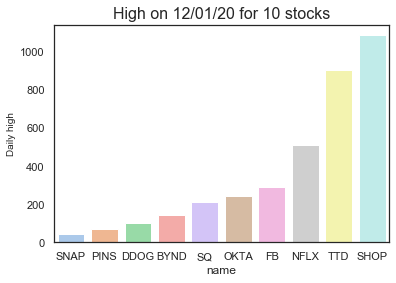

In [64]:
# Find the highest value from hourly_high for each stock and compare the results among different stocks
# Shoptify has the highest daily high while Snap has the lowest daily high
df_group=df.groupby(['name']).max().sort_values('hourly_high')
sns.barplot(x = df_group.index,y=df_group['hourly_high'], data = df_group)
plt.title('Daily high on 12/01/20 for 10 stocks',fontsize=16)
plt.ylabel('Daily high', fontsize=10)
plt.show()           

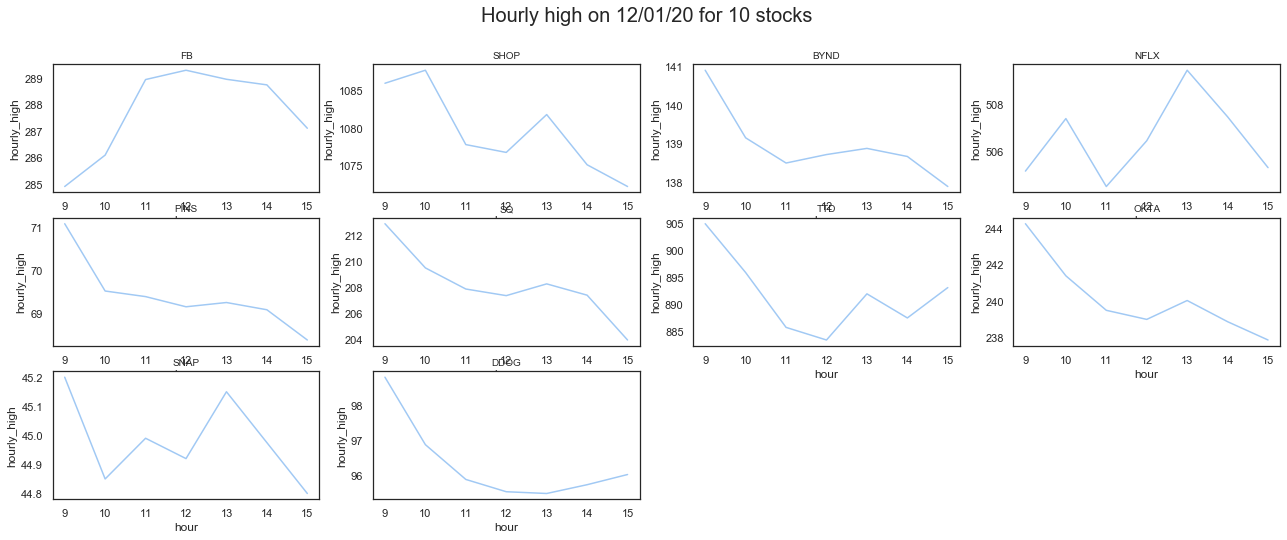

In [87]:
# draw a line plot for each stock to see their trend across the trading hours on 12/01/20
# Most stocks have a downward trend on that day 
from math import ceil
stock_list = ['FB', 'SHOP', 'BYND', 'NFLX', 'PINS', 'SQ', 'TTD', 'OKTA', 'SNAP', 'DDOG']
plt.subplots(figsize=(22,8)) 
plt.suptitle('Hourly high on 12/01/20 for 10 stocks',fontsize=20)
cols = 4
rows = ceil(len(stock_list)/cols)
for index, key in enumerate(stock_list):
    plt.subplot(rows, cols,index+1) 
    sns.lineplot(data=df[df["name"]==stock_list[index]], x="hour", y="hourly_high",markers=True)
    plt.title(stock_list[index],fontsize=10)
plt.show()

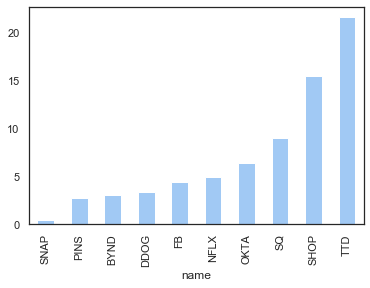

In [86]:
# caculate the highest value and lowest value among hourly_high for each sotck and calculate the difference
# draw a bar plot to comapre the difference among different stocks
# Thr trade desk has seen the biggest fluctuation among its hourly_high while Snap has the smallest fluctuation  
max_high=df.groupby(['name']).max()['hourly_high']
min_high=df.groupby(['name']).min()['hourly_high']
diff=max_high-min_high
diff.sort_values().plot.bar()
plt.title("hourly high fluctuation on 12/01/20 by stock")
plt.ylabel('daily difference for hourly high', fontsize=10)
plt.show()

(array([18.,  7.,  5.,  2.,  7.,  9.,  4.,  2.,  6., 12.]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <a list of 10 Patch objects>)

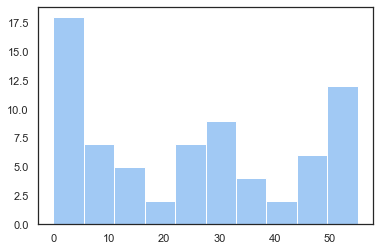

In [115]:
# count the frequency of the minute of when high price occurred
# highest hourly price is more likely to occur in the first 5 mins within an hour 
minute=df['ts'].str.slice(14,16)
minute=minute.astype(int)
plt.hist(minute)
plt.title("Distribution of minute")
plt.show()